In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import sweetviz as sv
import seaborn as sns

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
data=pd.read_csv("housing.csv")
data.info()
# On remarque qu'on des valeurs manquants dans la colonne 'total_bedrooms'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Exploring & Pre-Processing

In [8]:
data.dropna(inplace=True)
data.info() #Voilà les lignes dont la colonne 'total_bedrooms' e possède pas de valeur sont supprimées

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

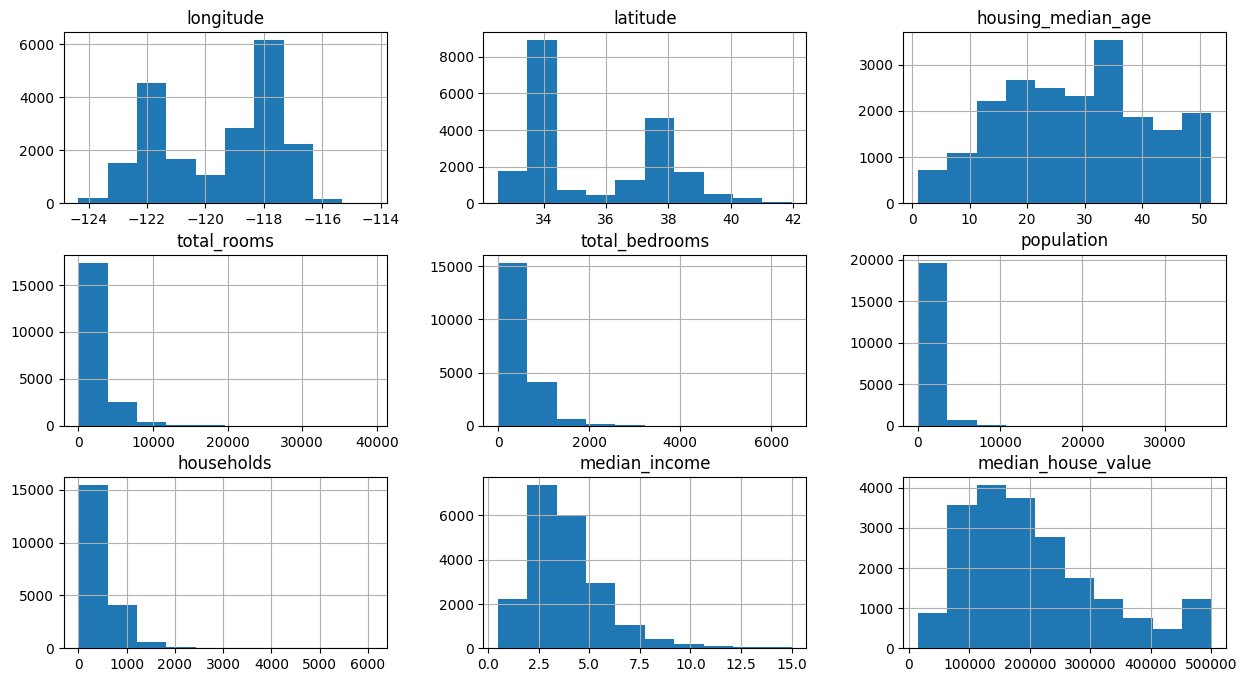

In [9]:
# On crée un histograme des données pour visualiser la structure des données
data.hist(figsize=(15,8))

In [117]:
# Génération d'un rapport HTML à partir d'une analyse des données 
rapport = sv.analyze(data)
rapport.show_html('rapport_avant.html')

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: longitude                           |▉         | [  9%]   00:00 -> (00:00 left)c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
Feature: latitude           

Report rapport_avant.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
data_dummies=pd.get_dummies(data['ocean_proximity'])
data_dummies.head()


,1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [5]:
data_df=pd.concat([data, data_dummies], axis=1)
data_df.drop(['ocean_proximity'], axis=1, inplace=True)
data_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


<Axes: >

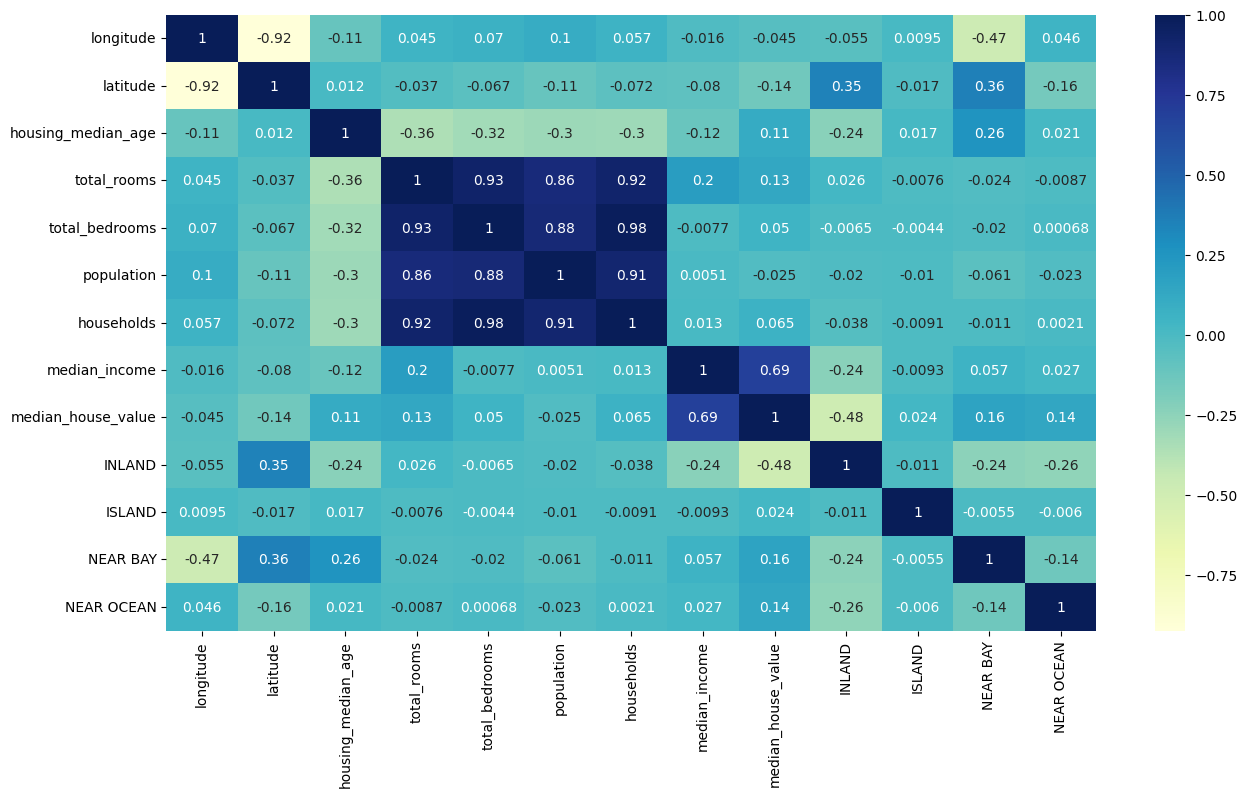

In [12]:
# Création d'une carte de chaleur de la corrélation entre les colonnes du DataFrame
# annot=True ajoute les valeurs numériques à chaque cellule de la carte de chaleur
# cmap='YlGnBu' définit la palette de couleurs pour la carte de chaleur
plt.figure(figsize=(15,8))
sns.heatmap(data_df.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

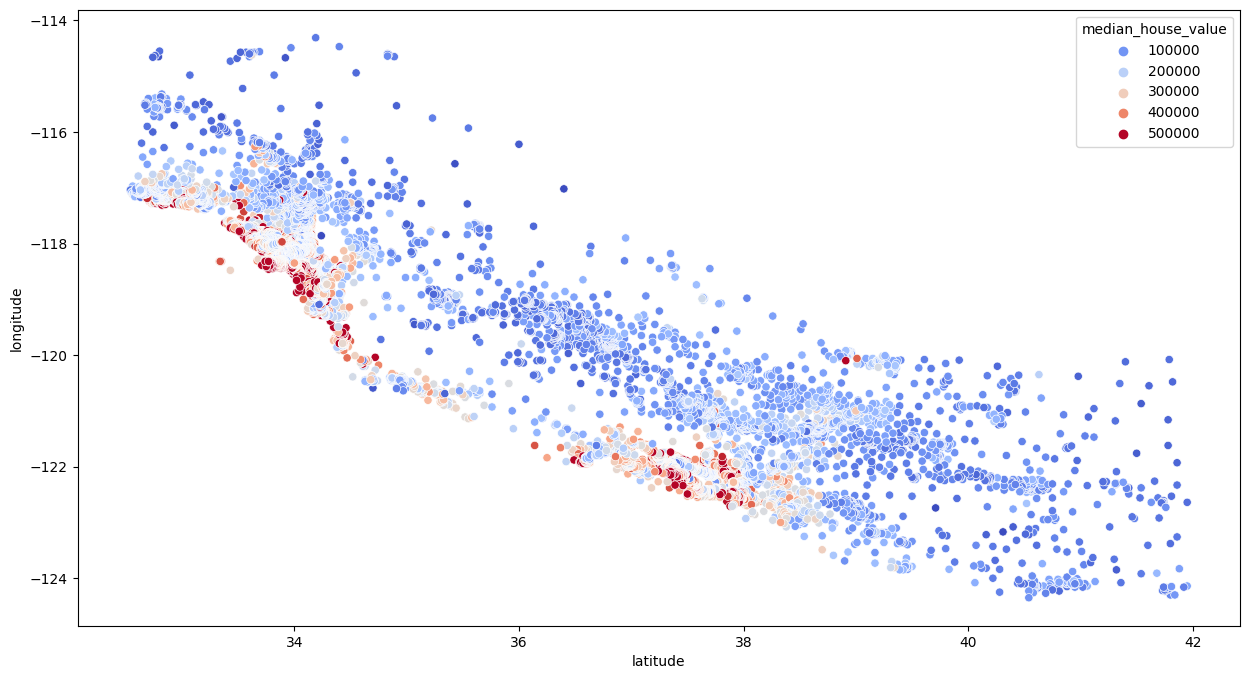

In [13]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=data_df, hue='median_house_value', palette='coolwarm')

###
On remarque les points rouge correspondent aux appartements les plus chers, et à partir de leurs partitions sur la carte on peut conclure qu'elles sont à coté de la plage. C'est-à-dire plus qu'on est proche de l'océan plus le prix augmente plus on éloigne le prix diminue. 

# Features Engineering

#### Cette Cellule prend jusqu'à 3 heures pour s'exécuter!!

In [123]:
from geopy.geocoders import Nominatim
import pandas as pd

# create a geocoder object
geolocator = Nominatim(user_agent='geoapiExercises')

# define a function to reverse geocode the coordinates and extract road, county, and city
def reverse_geocode(row):
    location = geolocator.reverse((row['latitude'], row['longitude']), exactly_one=True)
        
    address = location.raw['address']
    # if the values are missing we will replace them by empty string None
    if address.get('road') is None:
        address['road'] = None
    if address.get('county') is None:
        address['county'] = None
    if address.get('city') is None:
        address['city'] = None
    if address.get('neighbourhood') is None:
        address['neighbourhood'] = None
    
    return pd.Series({'road': address.get('road', ''),
                      'county': address.get('county', ''),
                      'city': address.get('city', ''),
                      'neighborhood': address.get('neighbourhood', '')})

# apply the reverse geocoding function to each row of the DataFrame
data_df[['Road', 'County', 'City','neighbourhood']] = data_df.apply(reverse_geocode, axis=1)

##### à cause de la long durée d'exécusion de la cellule précédente, nous allons enregistrer le résultat dans un fichier CSV 

In [ ]:
data_df.to_csv('data.csv', index=False)

In [22]:
import pandas as pd
data_df=pd.read_csv('data.csv')
data_df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Road,County,City,neighbourhood,1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,Convict Trail,Alameda County,Oakland,NaN,0,0,1,0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,Caldecott Tunnel,Alameda County,Oakland,NaN,0,0,1,0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,Grove Shafter Freeway,Alameda County,Oakland,Upper Rockridge,0,0,1,0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,Florio Street,Alameda County,Oakland,Rockridge,0,0,1,0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,Florio Street,Alameda County,Oakland,Rockridge,0,0,1,0


In [25]:
Final_Data=data_df
Final_Data.rename(columns = {'county':'County'}, inplace = True)
Final_Data.rename(columns = {'city':'City'}, inplace = True)
Final_Data.rename(columns = {'neighbourhood':'Neighborhood'}, inplace = True)
Final_Data.rename(columns = {'road':'Road'}, inplace = True)

In [29]:
Final_Data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Road,County,City,Neighborhood,1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,Convict Trail,Alameda County,Oakland,NaN,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,Caldecott Tunnel,Alameda County,Oakland,NaN,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,Grove Shafter Freeway,Alameda County,Oakland,Upper Rockridge,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,Florio Street,Alameda County,Oakland,Rockridge,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,Florio Street,Alameda County,Oakland,Rockridge,0,0,1,0


In [44]:
Final_Data.dropna(subset=['median_house_value','households','population','total_bedrooms','total_rooms','housing_median_age'], inplace=True)

In [47]:
import numpy as np
Final_Data[['median_house_value','households','population','total_bedrooms','total_rooms','housing_median_age']] = Final_Data[['median_house_value','households','population','total_bedrooms','total_rooms','housing_median_age']].astype(np.int64)

In [48]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20432
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20433 non-null  int64  
 1   total_rooms         20433 non-null  int64  
 2   total_bedrooms      20433 non-null  int64  
 3   population          20433 non-null  int64  
 4   households          20433 non-null  int64  
 5   median_income       20433 non-null  float64
 6   median_house_value  20433 non-null  int64  
 7   Road                20433 non-null  int32  
 8   County              20433 non-null  int32  
 9   City                20433 non-null  int32  
 10  1H OCEAN            20433 non-null  int64  
 11  INLAND              20433 non-null  int64  
 12  NEAR BAY            20433 non-null  int64  
 13  NEAR OCEAN          20433 non-null  int64  
dtypes: float64(1), int32(3), int64(10)
memory usage: 2.1 MB


#### On remarque la colonne Neghborhood contient seulement 2423 Valeurs non nulles, donc ça n'aura pas beaucoup de bénifice sur notre modèle et il peut meme le dégrader donc il vaut mieux l'éliminer a coté des colonnes 'longitude' et 'latitude' puisqu'on les remplacer par l'adresse

In [ ]:
Final_Data.drop(['Neighborhood'], axis=1, inplace=True)
Final_Data.drop(['longitude'], axis=1, inplace=True)
Final_Data.drop(['latitude'], axis=1, inplace=True)

In [33]:
Final_Data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Road,County,City,1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,Convict Trail,Alameda County,Oakland,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,Caldecott Tunnel,Alameda County,Oakland,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,Grove Shafter Freeway,Alameda County,Oakland,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,Florio Street,Alameda County,Oakland,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,Florio Street,Alameda County,Oakland,0,0,1,0


#### Il faut remplacer les valeurs de 'Road', 'County' et City par des valeurs numériques puisqu'on ne peut pas travailler avec des chaines de caractères!

In [59]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
Final_Data['Road']=le.fit_transform(Final_Data['Road'])
Final_Data['County']=le.fit_transform(Final_Data['County'])
Final_Data['City']=le.fit_transform(Final_Data['City'])

Final_Data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Road,County,City,1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,41,880,129,322,126,8.3252,452600,1787,0,73,0,0,1,0
1,21,7099,1106,2401,1138,8.3014,358500,1218,0,73,0,0,1,0
2,52,1467,190,496,177,7.2574,352100,3486,0,73,0,0,1,0
3,52,1274,235,558,219,5.6431,341300,3105,0,73,0,0,1,0
4,52,1627,280,565,259,3.8462,342200,3105,0,73,0,0,1,0


#### Nous aurons besoin de ce meme LabelEncoder dans le back-end pour transformer les entrées des utilisateurs en Nombres. Poue cela On va l'enregistrer!

In [51]:
import joblib
joblib.dump(le, 'le.joblib')

['le.joblib']

In [52]:
rapport = sv.analyze(Final_Data)
rapport.show_html('rapport_après.html')

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: housing_median_age                  |▋         | [  7%]   00:00 -> (00:00 left)c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
Feature: total_rooms        

Report rapport_après.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Model Training

#### Dernières modifications

In [60]:
X=Final_Data.drop(['median_house_value'],axis=1)
y=Final_Data['median_house_value']
# On définit les inputs et l'output qui le prix median de l'appartement

In [61]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.3,random_state=42)
# On divise les données en données d'entrainement et de test

#### Importations

In [62]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from  sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### Scaling

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Choix du meilleur model de regression

In [ ]:

models={"DecisionTreeRegressor": DecisionTreeRegressor(),"RandomForestRegressor": RandomForestRegressor(),"LinearRegression": LinearRegression(), "Ridge" :Ridge(alpha=0.1) }
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)


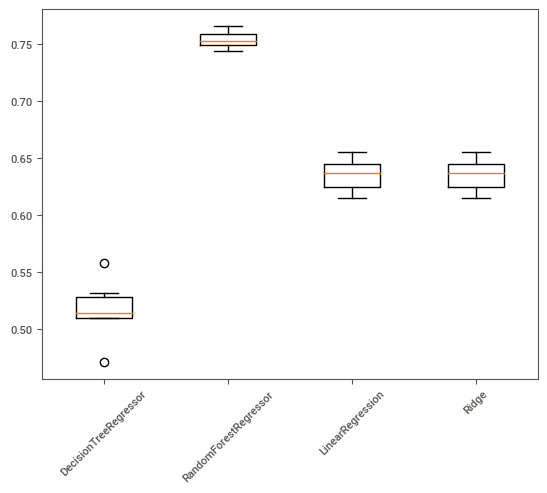

In [ ]:

plt.boxplot(results, labels=models.keys())
plt.xticks(rotation=45)
plt.show() 

# On remarque que le modèle qui a le meilleur score est le RandomForestRegressor

#### Trainage du model

In [64]:
steps=[("scaler",StandardScaler()),("RandomForestRegressor",RandomForestRegressor())]
pipeline=Pipeline(steps)
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)
print("R2 score: {}".format(pipeline.score(X_test,y_test))) 
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

R2 score: 0.7466630515570296
RMSE: 58113.83435669707


##### Enregistrement du modèle

In [65]:
#Enregistrer le model
joblib.dump(pipeline, 'model.joblib')

['model.joblib']

In [70]:
#Charger le model
model = joblib.load('model.joblib')
le=joblib.load('le.joblib')
# Tester le modèle avec des nouvelles données
X_new1={ "housing_median_age": 22, "total_rooms": 880, "total_bedrooms": 776,"population": 2769,"households":128,"median_income": 1.0, "Road": le.fit_transform(["Convict Trail"]), "County": le.fit_transform(["Alameda County"]), "City": le.fit_transform(["Oakland"]),"1H OCEAN": 0, "INLAND": 0, "NEAR BAY": 0, "NEAR OCEAN": 1}
X_new_df=pd.DataFrame(X_new1)
y_result=model.predict(X_new_df)
print(int(y_result))

225078


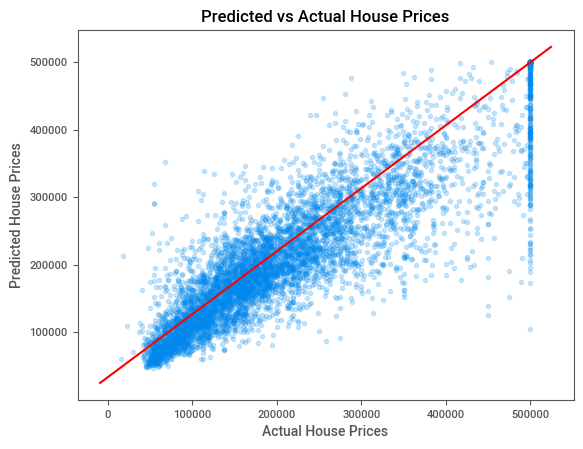

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.2)

# Add labels and title
ax.set_xlabel('Actual House Prices')
ax.set_ylabel('Predicted House Prices')
ax.set_title('Predicted vs Actual House Prices')

# Add a diagonal line to indicate perfect predictions
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.plot([xmin, xmax], [ymin, ymax], color='red')
plt.show()
